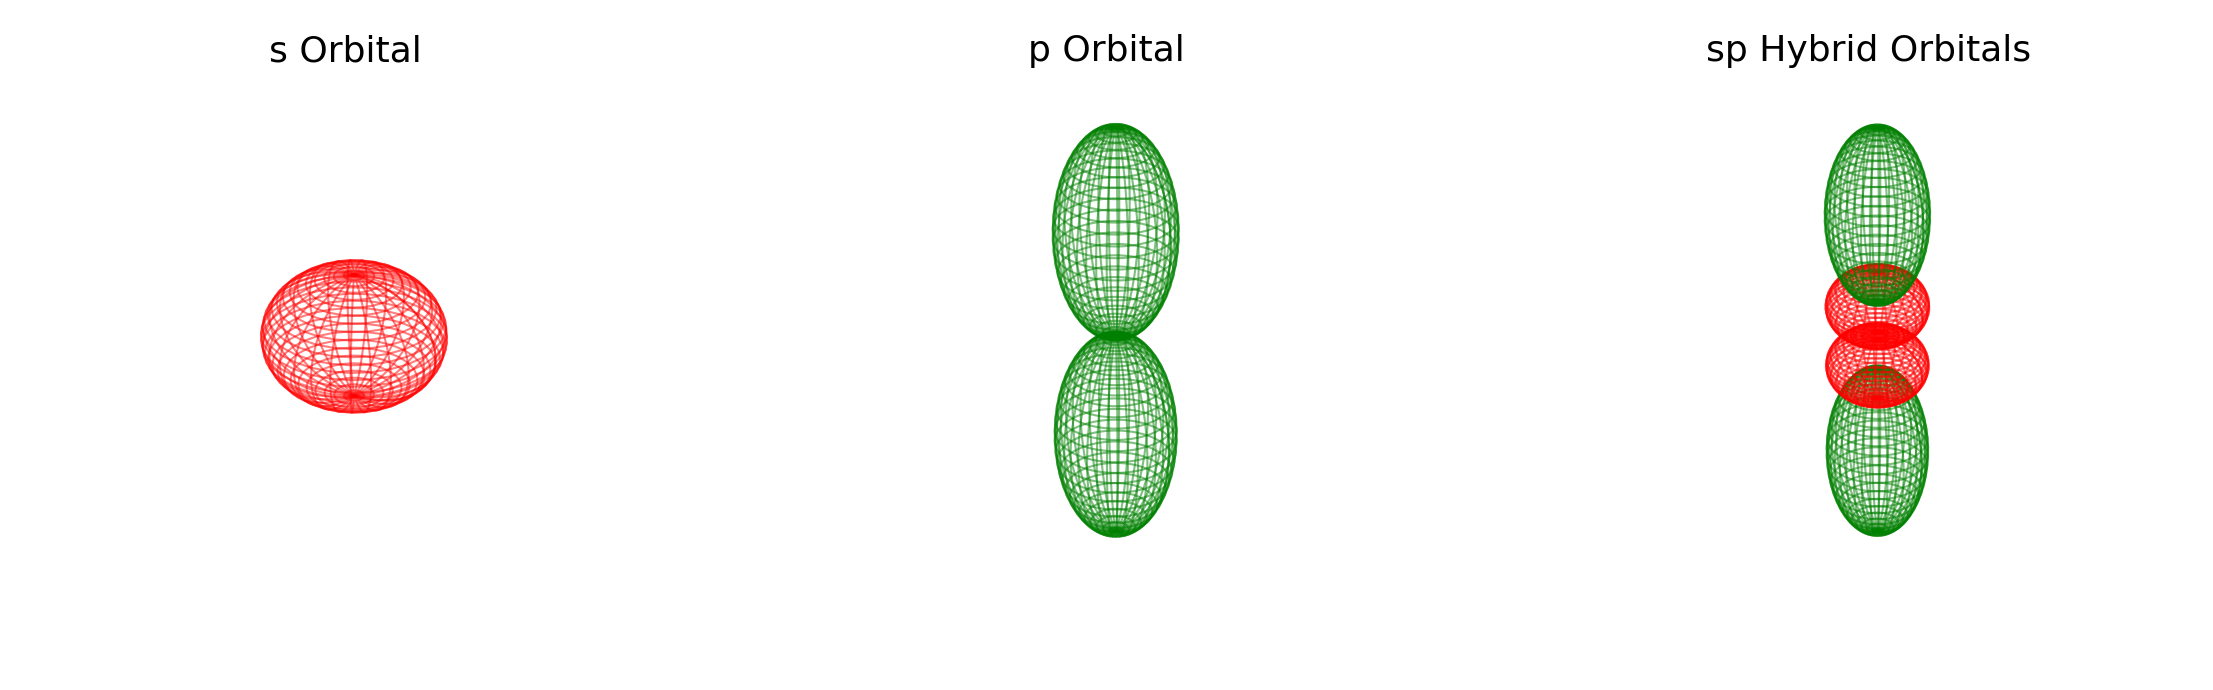

In [93]:
import numpy as np
import matplotlib.pyplot as plt

def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale.'''
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    plot_radius = 0.5 * max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

def s_orbital(ax, size=45, z_offset=0):
    u = np.linspace(0, 2 * np.pi, 30)
    v = np.linspace(0, np.pi, 30)
    x = size * np.outer(np.cos(u), np.sin(v))
    y = size * np.outer(np.sin(u), np.sin(v))
    z = size * np.outer(np.ones(np.size(u)), np.cos(v)) + z_offset
    ax.plot_wireframe(x, y, z, color='red', alpha=0.5)

def p_orbital(ax, size=30):
    u = np.linspace(0, 2 * np.pi, 75)
    v = np.linspace(0, np.pi, 30)
    x = size * np.outer(np.cos(u), np.sin(v))
    y = size * np.outer(np.sin(u), np.sin(v))
    z = 2.5 * size * np.outer(np.ones(np.size(u)), np.cos(v))
    
    # Dumbbell part 1
    ax.plot_wireframe(x, y, z + 2.5*size, color='green', alpha=0.5)
    
    # Dumbbell part 2
    ax.plot_wireframe(x, y, -z - 2.5*size, color='green', alpha=0.5)

def sp_hybrid(ax, size=25):
    # Define parameters
    p_length = 2.5 * size
    s_offset = size + p_length
    
    # p orbital dumbbell part (up)
    u = np.linspace(0, 2 * np.pi, 75)
    v = np.linspace(0, np.pi, 30)
    x = size * np.outer(np.cos(u), np.sin(v))
    y = size * np.outer(np.sin(u), np.sin(v))
    z = p_length * np.outer(np.ones(np.size(u)), np.cos(v)) + 1 * s_offset
    ax.plot_wireframe(x, y, z, color='green', alpha=0.5)
    
    # s orbital (up)
    s_orbital(ax, size, z_offset=s_offset/4)
    
    # s orbital (down)
    s_orbital(ax, size, z_offset=-s_offset/4)
    
    # p orbital dumbbell part (down)
    z = p_length * np.outer(np.ones(np.size(u)), np.cos(v)) - 1 * s_offset
    ax.plot_wireframe(x, y, z, color='green', alpha=0.5)

# Create the plot
fig = plt.figure(figsize=(23,7))  # Adjust width to bring them closer
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

# Adjust spacing between subplots to bring them closer
plt.subplots_adjust(hspace=20) 
# Set limits and titles with increased font size
fontsize_title = 15  # Define desired title font size
for ax in [ax1, ax2, ax3]:
    ax.set_xlim([-50, 50])
    ax.set_ylim([-50, 50])
    ax.set_zlim([-100, 100])
    ax.axis('off')

ax1.set_title('s Orbital', fontsize=26, y=0.99)
ax2.set_title('p Orbital', fontsize=26, y=0.99)
ax3.set_title('sp Hybrid Orbitals', fontsize=26, y=0.99)


# Draw orbitals
s_orbital(ax1)
p_orbital(ax2)
sp_hybrid(ax3)

for ax in [ax1, ax2, ax3]:
    set_axes_equal(ax)

plt.tight_layout()
import os

# Check if the 'figs' subfolder exists, if not, create it
if not os.path.exists('figs'):
    os.makedirs('figs')

# Save the plot in the 'figs' subfolder
plt.savefig('figs/sp_orbitals.pdf', format='pdf')

plt.show()


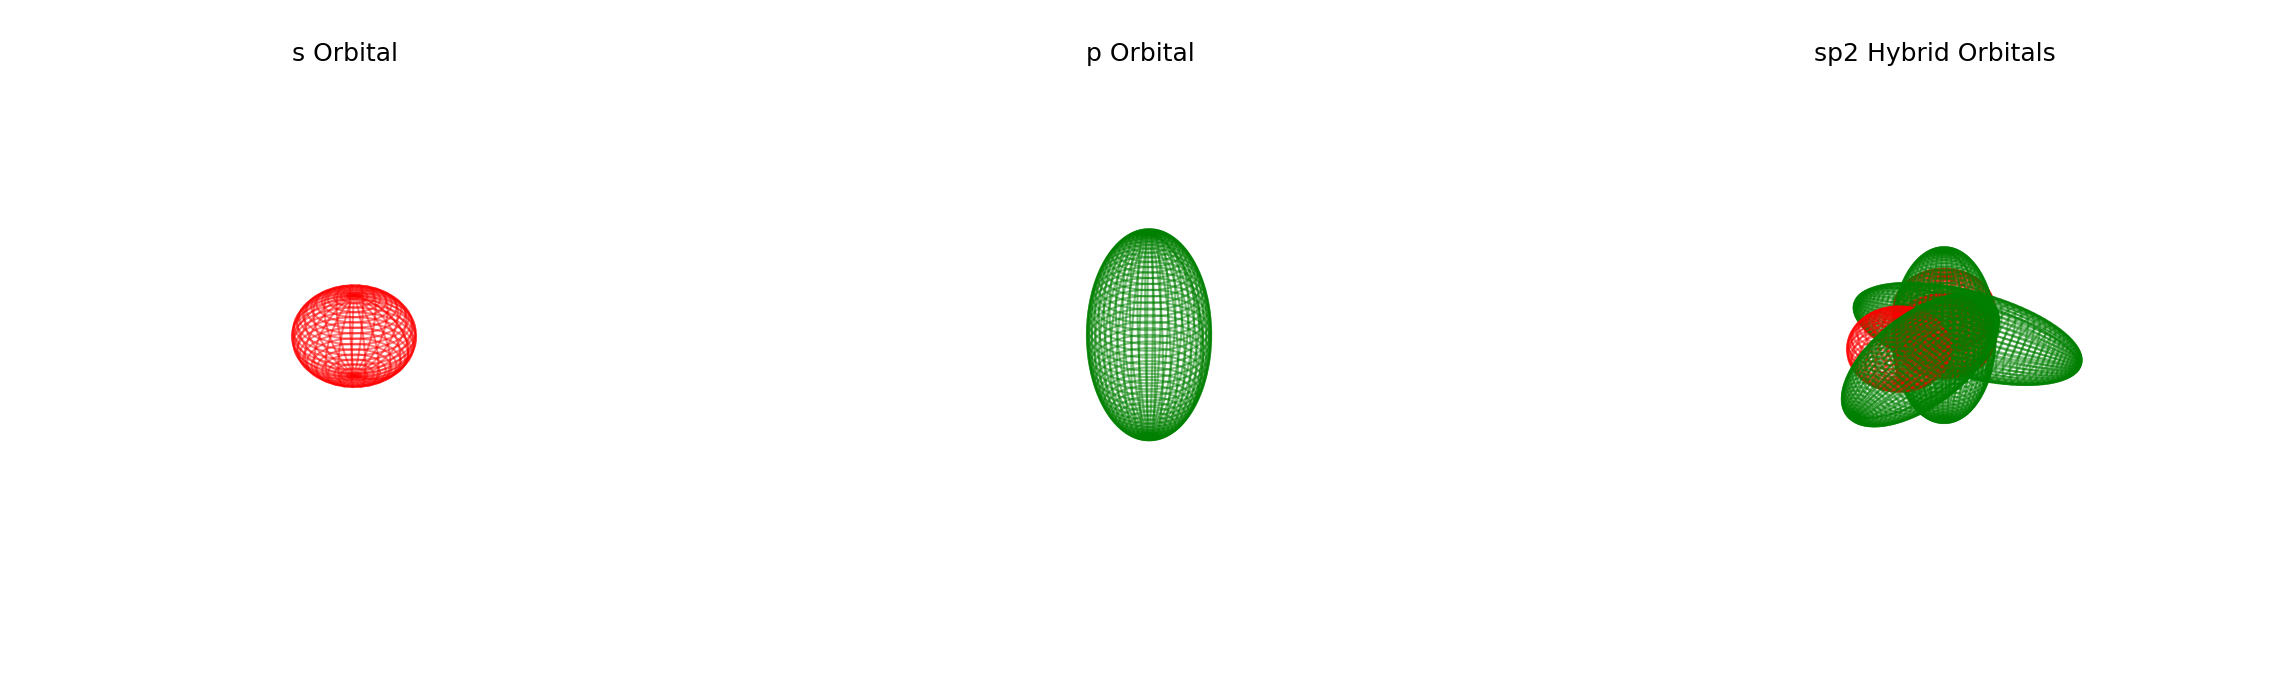

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import os

def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale.'''
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    plot_radius = 0.5 * max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

def s_orbital(ax, size=30, z_offset=0, x_offset=0, y_offset=0):
    u = np.linspace(0, 2 * np.pi, 30)
    v = np.linspace(0, np.pi, 30)
    x = size * np.outer(np.cos(u), np.sin(v)) + x_offset
    y = size * np.outer(np.sin(u), np.sin(v)) + y_offset
    z = size * np.outer(np.ones(np.size(u)), np.cos(v)) + z_offset
    ax.plot_wireframe(x, y, z, color='red', alpha=0.5)

def p_orbital(ax, size=30, z_offset=0, x_offset=0, y_offset=0, direction='z'):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 50)
    x = size * np.outer(np.cos(u), np.sin(v)) + x_offset
    y = size * np.outer(np.sin(u), np.sin(v)) + y_offset
    z = 2.5 * size * np.outer(np.ones(np.size(u)), np.cos(v)) + z_offset
    if direction == 'x':
        x, y, z = z, y, x
    elif direction == 'y':
        x, y, z = x, z, y
    ax.plot_wireframe(x, y, z, color='green', alpha=0.5)

def sp2_hybrid(ax, size=25):
    angle_rad = 2 * np.pi / 3
    s_offset = size

    # Create s-orbitals in a triangle formation
    s_orbital(ax, size, x_offset=0, y_offset=0)
    s_orbital(ax, size, x_offset=s_offset*np.cos(angle_rad), y_offset=s_offset*np.sin(angle_rad))
    s_orbital(ax, size, x_offset=s_offset*np.cos(2*angle_rad), y_offset=s_offset*np.sin(2*angle_rad))

    # Add the p-orbitals
    p_orbital(ax, size, z_offset=0, x_offset=0, y_offset=0)
    p_orbital(ax, size, z_offset=0, direction='x', x_offset=s_offset*np.cos(angle_rad), y_offset=s_offset*np.sin(angle_rad))
    p_orbital(ax, size, z_offset=0, direction='y', x_offset=s_offset*np.cos(2*angle_rad), y_offset=s_offset*np.sin(2*angle_rad))


# Create the plot
fig = plt.figure(figsize=(24,7))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

# Adjust spacing between subplots to bring them closer
plt.subplots_adjust(wspace=2) 

for ax in [ax1, ax2, ax3]:
    ax.set_xlim([-50, 50])
    ax.set_ylim([-50, 50])
    ax.set_zlim([-100, 100])
    ax.axis('off')

ax1.set_title('s Orbital', fontsize=18, y=0.99)
ax2.set_title('p Orbital', fontsize=18, y=0.99)
ax3.set_title('sp2 Hybrid Orbitals', fontsize=18, y=0.99)

# Draw orbitals
s_orbital(ax1)
p_orbital(ax2)
sp2_hybrid(ax3)

for ax in [ax1, ax2, ax3]:
    set_axes_equal(ax)

plt.tight_layout()

# Check if the 'figs' subfolder exists, if not, create it
if not os.path.exists('figs'):
    os.makedirs('figs')

# Save the plot in the 'figs' subfolder
plt.savefig('figs/sp2_orbitals.pdf', format='pdf')

plt.show()
